#### 3A representatives extraction from bgsu database
[Link](http://rna.bgsu.edu/rna3dhub/nrlist/release/3.242/3.0A)

In [32]:
import os
PATH = "../external-files/nrlist_3.242_3.0A.csv"
with open(PATH) as f:
    lines = f.readlines()
print(len(lines))

1646


In [33]:
pdbs = [l.strip() for l in lines]
pdbs = [p.split(',')[1:2] for p in pdbs]

def additional_chains(pdb):
    if '+' in pdb:
        pdb_ab = pdb.split("+")
        pdb_ab = [p.split("|") for p in pdb_ab]
        core = "_".join(pdb_ab[0][:-1])
        pdb = f"{core}_{pdb_ab[0][-1]}-{pdb_ab[1][-1]}"
    else:
        pdb = pdb.split("|")
        pdb = "_".join(pdb)
    return pdb

def combine_ids(pdb_line):
    pdbs = [p.replace("\"", "").replace("\'", "") for p in pdb_line]
    pdbs = [additional_chains(p) for p in pdbs]
    return pdbs

pdbs = [combine_ids(p) for p in pdbs]
pdbs = [p[0] for p in pdbs]
pdb_repres = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in pdbs]
print(pdbs[:10])

with open('../metadata/representants.txt', 'w') as f:
    out = "\n".join(pdbs)
    f.writelines(out)

['6CFJ_1_1x', '5L4O_1_A', '5E81_1_2K', '6I0V_1_B', '6YDP_1_BB', '2DU3_1_D', '1KUQ_1_B', '5K77_1_X', '5J7L_1_DB', '3BT7_1_D']


### Representatives from SPOT-RNA test set

In [49]:
import os
train_pdbs = "../external-files/PDB_dataset/TR1_sequences/"
test_pdbs1 = "../external-files/PDB_dataset/TS1_sequences/"
test_pdbs2 = "../external-files/PDB_dataset/TS2_sequences/"

def get_pdb_ids(path, remove_chain:bool=True):
    pdbs = os.listdir(path)
    pdbs = [p.replace("-", "_") for p in pdbs]
    pdbs = [f'{p[:4].upper()}{p[4:]}' for p in pdbs]
    if remove_chain:
        pdb_repres = [f'{p.split("_")[0]}_{p.split("_")[2]}' for p in pdbs]
        return pdb_repres
    else:
        return pdbs

trpdbs = get_pdb_ids(train_pdbs)
tspdbs1 = get_pdb_ids(test_pdbs1)
tspdbs2 = get_pdb_ids(test_pdbs2, False)
tspdbs1.extend(tspdbs2)
print(trpdbs[:10])
print(len(tspdbs1), len(tspdbs2))

['3SKI_A', '2HVY_E', '4PMI_A', '1FFK_9', '2CSX_C', '2ZNI_C', '4Y1J_A', '4KZD_R', '4V83_AV', '2A64_A']
106 39


In [4]:
print(len(set(trpdbs).intersection(pdbs)))
print(len(set(tspdbs1).intersection(pdbs)))

57
32


In [29]:
p = "../external-files/Rfam.pdb"
with open(p) as f:
    lines = f.readlines()
pdb_mapping = [l.strip() for l in lines]
pdb_mapping = [l.split('\t') for l in pdb_mapping]

pdbs_families = {}
for p in pdb_mapping[1:]:
    family = p[0]
    pdb_id = p[1]
    chain = p[2]
    full_id = f'{pdb_id.upper()}_{chain}'
    pdbs_families[full_id] = family
print(pdbs_families['5AXM_P'])


RF00005


In [55]:
from collections import Counter


def get_representations(subset, pdbs_families):
    keys = set(pdbs_families.keys())
    sub = set(subset).intersection(keys)
    print(f'All pdb keys:{len(keys)}, Given set len: {len(subset)},  Subset intersection: {len(sub)}')
    missing = []
    for s in subset:
        if s not in pdbs_families:
            print(s)
            missing.append(s)
    r = [pdbs_families[s] for s in sub]
    c = Counter(r)
    return c, missing

x, missing = get_representations(trpdbs, pdbs_families)



All pdb keys:7659, Given set len: 120,  Subset intersection: 63
3SKI_A
2HVY_E
4PMI_A
2ZNI_C
4Y1J_A
4KZD_R
4V83_AV
5DE5_A
5TPY_A
3R9X_C
2ZH2_B
6CF2_G
1UN6_E
3R4F_A
5KPY_A
4Y1M_B
1MZP_B
4UYK_R
1KH6_A
2GTT_X
2OIU_P
6C63_A
4U7U_L
4KR6_C
4R4P_A
3KTW_C
1KOG_I
6D12_C
3E5C_A
6D3P_A
4JRC_A
6IFO_D
4FNJ_A
2NUE_C
5BJO_E
5VOE_A
3IAB_R
3ICQ_D
1DUL_B
1DDY_A
4X4P_B
3GCA_A
4OJI_A
6DTD_C
4OQU_A
4RMO_B
4RGE_A
4PLX_A
4C7O_E
1I6U_C
5U3G_B
4PDB_I
4M4O_B
2QWY_A
4O26_E
1U63_B
1DK1_B


In [56]:
with open("missing-pdbs.txt", 'w') as f:
    f.writelines([f'{x}\n' for x in missing])

In [83]:
p = '/data/2d-rna/dbn-cifs'
mapp = os.listdir(p)
vals = [f'{p.split("_")[0]}_{p.split("_")[2].replace(".dbn", "")}' for p in mapp]
mapping = {}
for m, v in zip(mapp, vals):
    mapping[v] = m
for m in missing:
    with open(os.path.join(p, f'{mapping[m]}')) as f:
        l = f.readlines()[-1].strip()
    c = Counter(l)
    fact = 1-(c['.']/len(l))
    if fact > 0.3:
        print(f'>{m} {round(fact, 2)}')
        print(l)
        print()

>3SKI_A 0.76
(((((((((..((((((.....[[))))))[.....)](((((((]]..)))))))..))))))))

>2HVY_E 0.52
(((((((((......(((((((.............)))))))......)))))))))....

>4PMI_A 0.65
((((((...((..(((((....))).))...)).))))))

>2ZNI_C 0.56
((((.((.((((.....)))).((((.(.......).))))...(((((.......))))))).))))....

>4Y1J_A 0.66
(((((......((.((((....))))((((((((((.......(((((....)))))))))))))))(((((((....)))))))..))....)))))..

>4KZD_R 0.6
((((((((((..((((.(.....(...(((((((((.....)))))))..)).........)..).))))..).)))))))))

>4V83_AV 0.86
((((.(.(((((.[[[[[)))))).))))]]]]].

>5DE5_A 0.4
(((((.((....................)))))))

>5TPY_A 0.7
..{.(((((((((....)))).((((((..[[[[...))))))}.)))))...]]]](((((....)))))

>3R9X_C 0.57
(((((((((.(...))))))))))...........

>2ZH2_B 0.71
((((((((((((.......))))))))))))...

>6CF2_G 0.69
(((((..(((((((....))))..)))...)))))

>1UN6_E 0.59
((((((....((....))(((((((.....((..(....)..))....)))))))))))))

>3R4F_A 0.7
((((.(((((((((......((((......)))))))))))))...((((((....))))))))))


In [51]:
vals = list(x.values())
keys = list(x.keys())
vk = sorted(zip(keys, vals), key=lambda x : x[1], reverse=True)
keys = [x[0] for x in vk]
vals = [x[1] for x in vk]
print(vk)

[('RF00005', 30), ('RF00026', 2), ('RF02541', 2), ('RF00059', 2), ('RF00001', 2), ('RF00167', 2), ('RF01852', 2), ('RF01831', 2), ('RF02001', 2), ('RF00390', 1), ('RF01750', 1), ('RF00379', 1), ('RF01854', 1), ('RF00505', 1), ('RF00162', 1), ('RF02553', 1), ('RF00380', 1), ('RF01415', 1), ('RF00504', 1), ('RF00023', 1), ('RF01051', 1), ('RF02680', 1), ('RF00011', 1), ('RF00174', 1), ('RF00008', 1), ('RF01786', 1)]


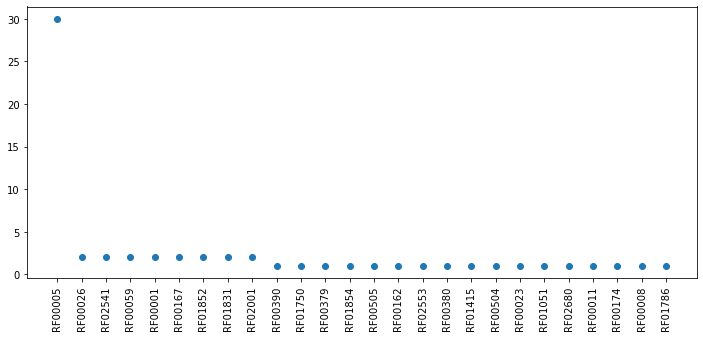

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))
plt.scatter(keys, vals)
_ = plt.xticks(rotation=90)
# plt.yticks(np.arange(0, 110, 10))